Import Necessary Modules

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [82]:
df = pd.read_csv('../data/raw/Fraud_Data.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Data Cleaning

In [65]:
df.isna().sum() # no null values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [83]:
df.drop_duplicates(inplace=True) # drop duplicates

# Convert time-related columns to datetime format
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


EDA

Text(0.5, 1.0, 'Distribution of Purchase Values')

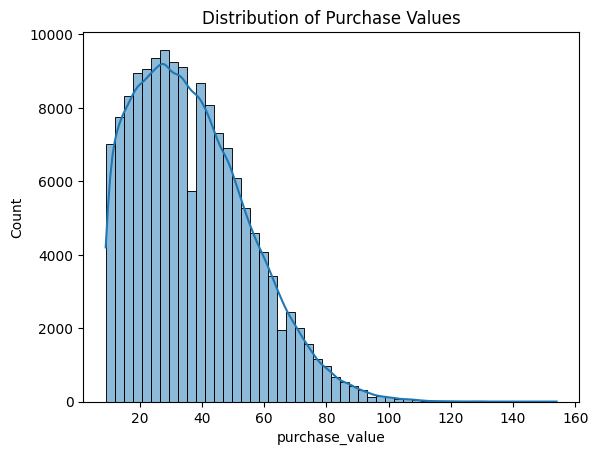

In [68]:
# Univariate analysis

sns.histplot(data=df, x='purchase_value', bins=50, kde=True)
plt.title('Distribution of Purchase Values')

Text(0.5, 1.0, 'Distribution of Fraudulent vs Non-Fraudulent Transactions')

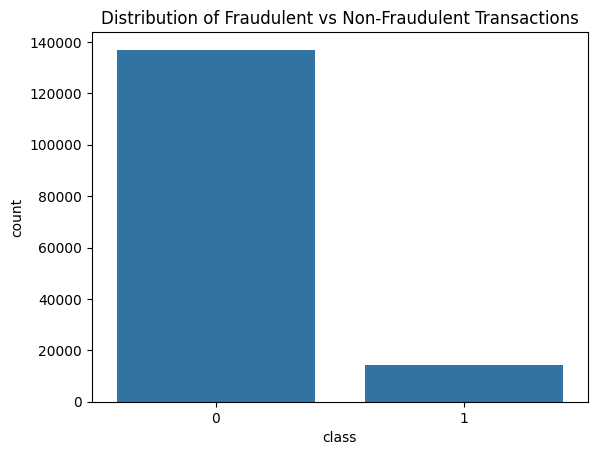

In [69]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')

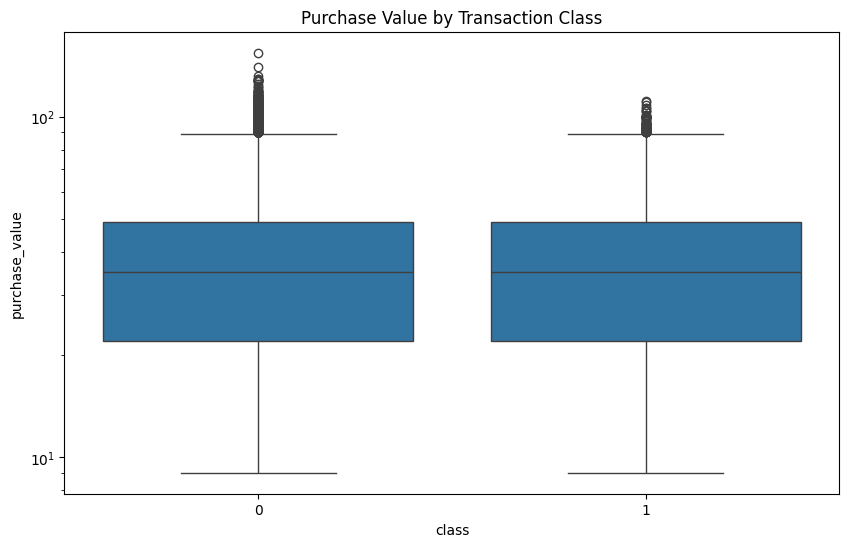

In [70]:
# Bivariate analysis

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value by Transaction Class')
plt.yscale('log')
plt.show()

In [84]:
# class distribution analysis

class_counts = df['class'].value_counts(normalize=True)
print("Class Distribution:\n", class_counts)

Class Distribution:
 class
0    0.906354
1    0.093646
Name: proportion, dtype: float64
